In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#for decomp
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df1=pd.read_csv('AirPassengers.csv',parse_dates=['Month'])
df1=pd.read_csv('AirPassengers.csv',parse_dates=['Month'],index_col='Month')
# TO WORK WITH TSA TIME COLLUMN SHOULD BE TREATED AS INDEX
df1.columns=['passengers']
df1.head() #month is index now

,passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df1.dtypes

passengers    int64
dtype: object

In [7]:
df1['1949-04-01':'1950-04-01']   # randomly bw 2

,passengers
Month,
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136
1949-10-01,119
1949-11-01,104
1949-12-01,118


In [8]:
df1.loc['1949-11-01']   #loc for exact value

passengers    104
Name: 1949-11-01 00:00:00, dtype: int64

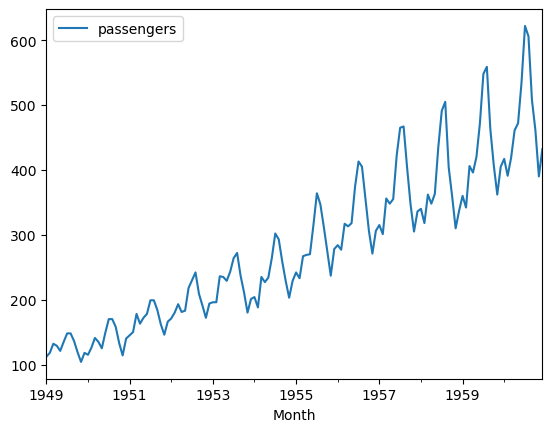

In [11]:
df1.plot()
plt.show()
#upward trend, seasonality is not constant, the regular pattern is increasing^
#when seasonity is not const or changing with trend we use multiplicative model

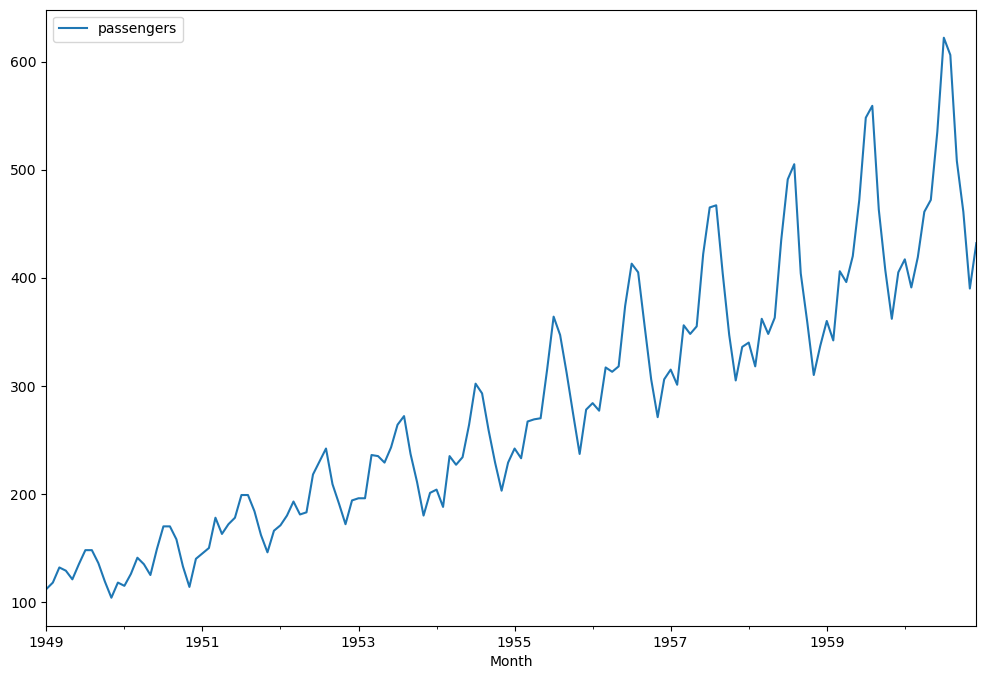

In [14]:
#increase size
from pylab import rcParams
rcParams['figure.figsize']=12,8     #l,b
df1.plot()     # growth is more in each season
plt.show()

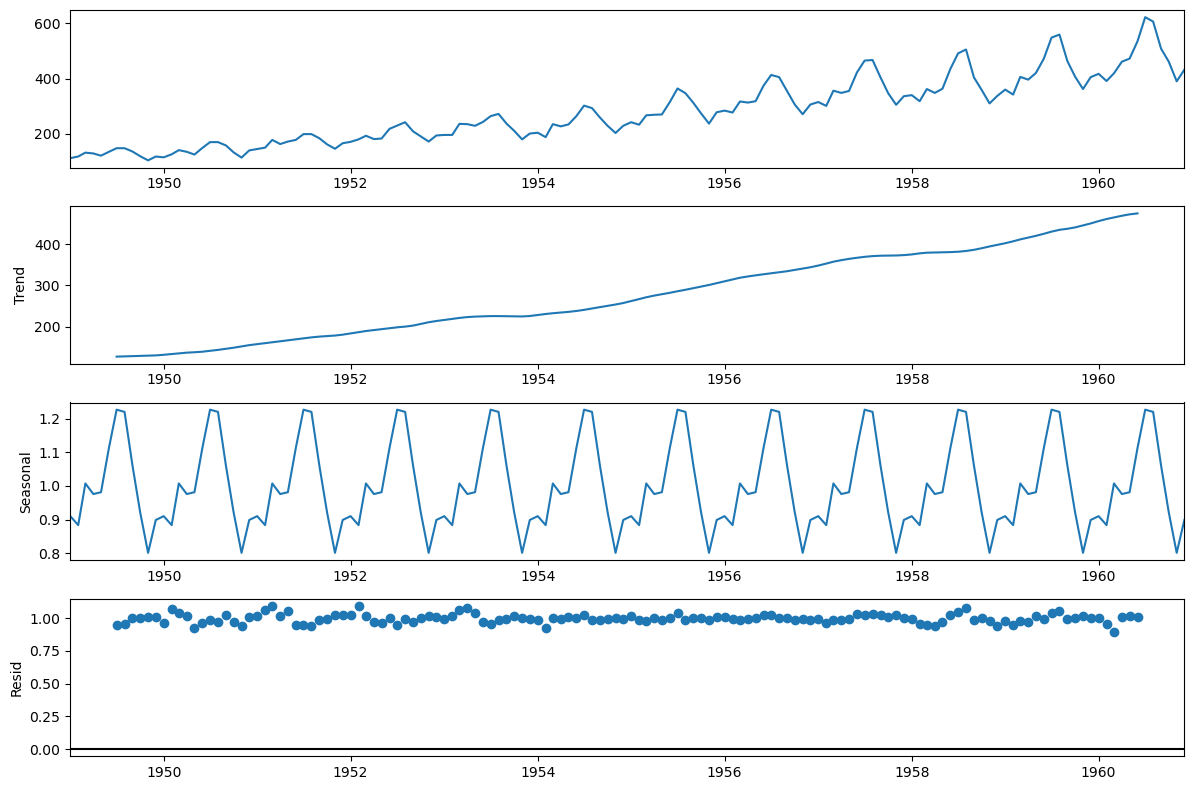

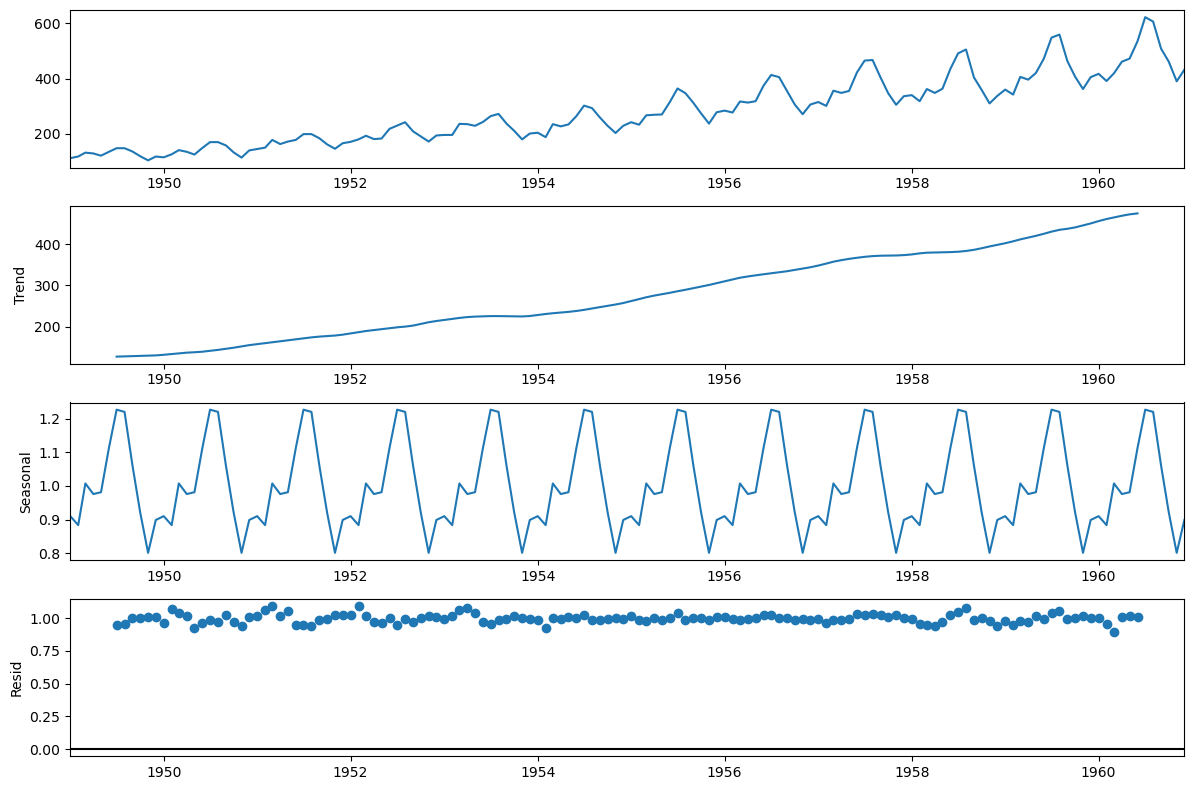

In [17]:
#decomopose the ts multiplicatively
df1_mul_decompose=seasonal_decompose(df1,model='multiplicative')
df1_mul_decompose.plot()

In [20]:
# toconvert multiplicstive to additive model take log of multiplicative y
df1_log=df1.copy()

In [21]:
df1_log['passengers']=np.log(df1)

In [22]:
df1_log.passengers

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: passengers, Length: 144, dtype: float64

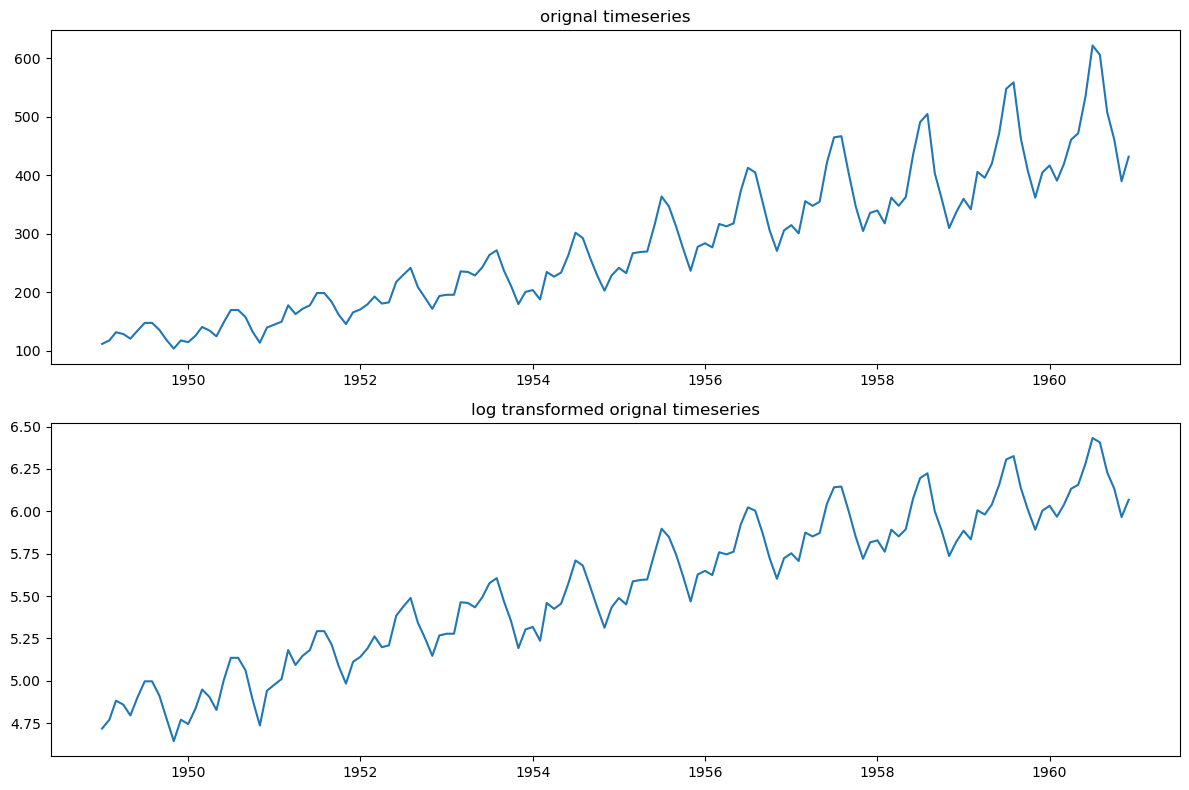

In [25]:
plt.subplot(2,1,1)
plt.title('orignal timeseries')
plt.plot(df1)
plt.subplot(2,1,2)
plt.title('log transformed orignal timeseries')
plt.plot(df1_log)
plt.tight_layout()